In [100]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

Create function

$$f(x, y) = \sin(\sqrt{x^2 + y^2})$$

In [120]:
def func(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

In [125]:
x_array = np.arange(-5, 5, 0.25)
y_array = np.arange(-5, 5, 0.25)
x_array, y_array = np.meshgrid(x_array, y_array)
func_array = list()

In [126]:
for x, y in zip(x_array, y_array):
    func_array.append(func(x, y))

In [127]:
func_array = np.array(func_array)

In [172]:
def show_3d_plot(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    plt.title("plot of func")
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.grid(True)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(x, y)")
    plt.show()

<IPython.core.display.Javascript object>


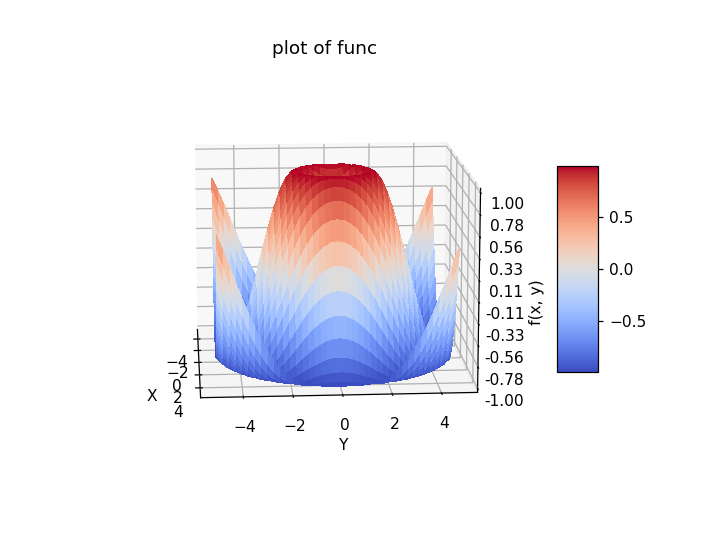

In [173]:
show_3d_plot(x_array, y_array, func_array)

Now, let`s find gradient of this function

$$\nabla f(x, y) =  \begin{bmatrix} \dfrac{\partial f(x, y)}{\partial x} \dfrac{\partial f(x, y)}{\partial y} \end{bmatrix} = \begin{bmatrix} (\sin(\sqrt{x^2 + y^2})^`_x \ (\sin(\sqrt{x^2 + y^2)})^`_y \end{bmatrix} = \begin{bmatrix} \dfrac{\cos(\sqrt{x^2 + y^2})x}{\sqrt{x^2 + y^2}} \ \dfrac{\cos(\sqrt{x^2 + y^2})x}{\sqrt{x^2 + y^2}}\end{bmatrix}$$

In [136]:
def partial_by_x(x, y):
    return (np.cos(np.sqrt(x**2 + y**2))*x)/np.sqrt(x**2 + y**2)

def partial_by_y(x, y):
    return np.cos(np.sqrt(x**2 + y**2))*y/np.sqrt(x**2 + y**2)

def get_grad(x, y):
    return np.array([partial_by_x(x, y), partial_by_y(x, y)])

In [159]:
grad = list()

In [160]:
for x, y in zip(x_array, y_array):
    grad.append([partial_by_x(x, y), partial_by_y(x, y)])

C:\Users\Legion\AppData\Local\Temp\ipykernel_26144\97020757.py:2: RuntimeWarning: invalid value encountered in true_divide
  return (np.cos(np.sqrt(x**2 + y**2))*x)/np.sqrt(x**2 + y**2)
C:\Users\Legion\AppData\Local\Temp\ipykernel_26144\97020757.py:5: RuntimeWarning: invalid value encountered in true_divide
  return np.cos(np.sqrt(x**2 + y**2))*y/np.sqrt(x**2 + y**2)


In [166]:
grad = np.array(grad)

<IPython.core.display.Javascript object>


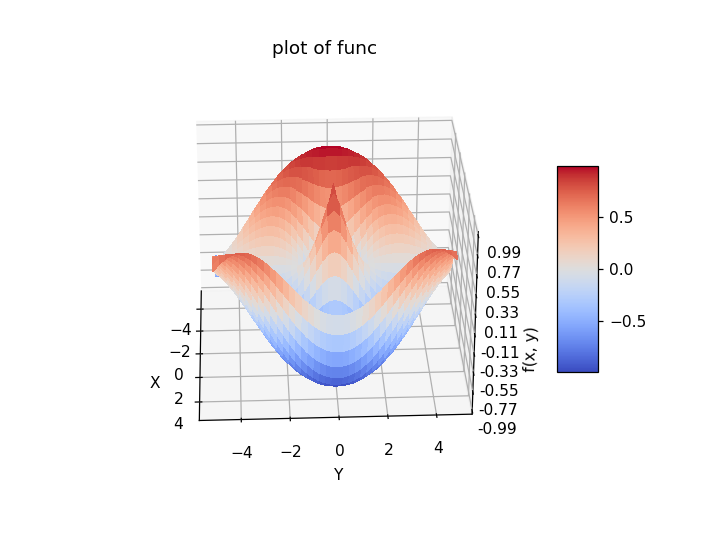

In [174]:
show_3d_plot(x_array, y_array, grad[:, 0]) # for partial x

<IPython.core.display.Javascript object>


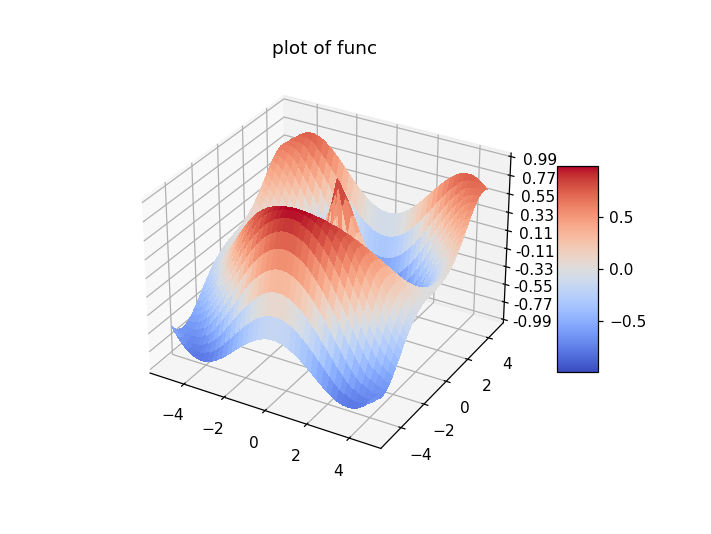

In [170]:
show_3d_plot(x_array, y_array, grad[:, 1]) # for partial y